In [1]:
import pandas as pd
import pathlib

RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

df = pd.read_csv(f"{RUTA}/Data/Data2.csv", encoding='latin1', sep=',', on_bad_lines='skip')
df.shape

(1999889, 26)

In [3]:
df.head(5)

,Amount,Is_Fraud,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,Errors_Insufficient Balance,...,Dia_Semana_MiÃ©rcoles,Dia_Semana_SÃ¡bado,Dia_Semana_Viernes,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
0,0.870166,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,0.905811,1.531309,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.744696,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-1.230862,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.060533,0,1.058518,-0.269604,0.217595,-4.105101,-1.592169,-0.445224,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.139404,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-1.142108,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.390713,0,1.058518,-0.269604,0.217595,-4.105101,-1.304044,-0.326885,1.531309,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999889 entries, 0 to 1999888
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount                       float64
 1   Is_Fraud                     int64  
 2   IngresoAnual                 float64
 3   DebitoTotal                  float64
 4   FICO_Score                   float64
 5   Year                         float64
 6   Month                        float64
 7   Time                         float64
 8   LimiteCredito                float64
 9   Errors_Insufficient Balance  float64
 10  Errors_Otros_errores         float64
 11  Errors_SIN ERROR             float64
 12  Dia_Semana_Domingo           float64
 13  Dia_Semana_Jueves            float64
 14  Dia_Semana_Lunes             float64
 15  Dia_Semana_Martes            float64
 16  Dia_Semana_MiÃ©rcoles        float64
 17  Dia_Semana_SÃ¡bado           float64
 18  Dia_Semana_Viernes           float64
 19  

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [6]:
# Cargar datos
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Aplicar SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [9]:
# Calcular scale_pos_weight
# Calcula el ratio entre las clases para usarlo en scale_pos_weight
import numpy as np
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)


In [10]:
ratio

798.9554285714286

In [11]:
# Crear el modelo con scale_pos_weight

import xgboost as xgb
model = xgb.XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')


In [12]:
#Entrenar el modelo

model.fit(X_train, y_train)

c:\Users\Userr\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred = model.predict(X_test)

In [15]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[560922  38295]
 [   341    409]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    599217
           1       0.01      0.55      0.02       750

    accuracy                           0.94    599967
   macro avg       0.50      0.74      0.49    599967
weighted avg       1.00      0.94      0.97    599967



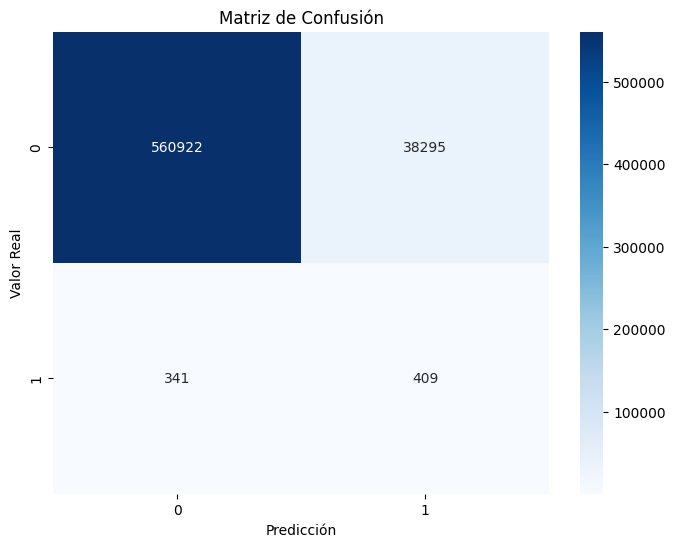

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


In [17]:
# Identificando el procentual de error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_auc_score

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Error porcentual : 6.439688
AUC-ROC: 0.8716365735062033
Exactitud: 0.9356031248385328


In [18]:
#poner a prueba el modelo clf
RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore
DatosPrueba = pd.read_csv(f"{RUTA}/Data/DatosVerificacion.csv", encoding='latin1', sep=',', on_bad_lines='skip')
DatosPrueba.shape

(10, 26)

In [19]:
XPrueba = DatosPrueba.drop('Is_Fraud', axis=1)
yPrueba = DatosPrueba['Is_Fraud']

In [20]:
#El conjunto de datos para prueba tiene 10 transacciones, 5 fraudulentas y 5 que no lo son, DatosPrueba =[1,1,1,1,1,0,0,0,0,,0]
Prediccion = model.predict(XPrueba)

In [22]:
Prediccion

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

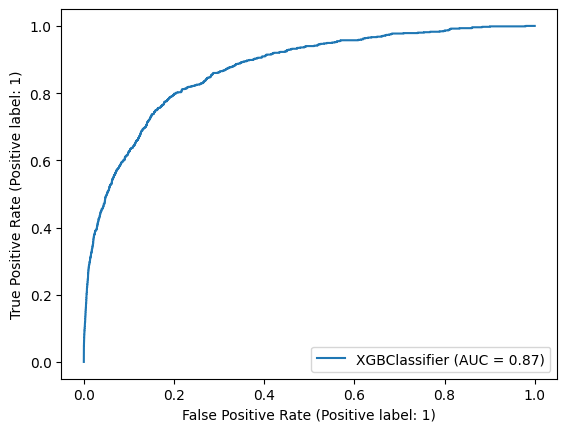

In [23]:
# graficamente como clasisfica el modelo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()